# Regressione Lineare Semplice

In questa esercitazione si utilizza il dataset FuelConsumptionCo2.csv che contiene informazioni sul consumo di carburante per alcuni modelli di automobili ([fonte](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)).
Lo scopo è implementare un modello di regressione lineare semplice tramite scikit-learn per predire le emissioni di CO2.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

%matplotlib inline

In [4]:
# Caricamento del dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)  # definizione del dataset
df.sample(5)  # visualizzazione di cinque righe random del dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
289,2014,CHRYSLER,300 FFV,FULL-SIZE,3.6,6,A8,E,16.8,10.3,13.9,20,222
163,2014,CADILLAC,CTS COUPE AWD,MID-SIZE,3.6,6,AS6,X,13.3,9.0,11.4,25,262
888,2014,PORSCHE,BOXSTER S,TWO-SEATER,3.4,6,AM7,Z,11.3,7.9,9.8,29,225
393,2014,FORD,FIESTA,SUBCOMPACT,1.6,4,M5,X,8.6,6.4,7.6,37,175
882,2014,PORSCHE,911 TURBO,MINICOMPACT,3.8,6,AM7,Z,13.7,9.6,11.9,24,274


In [7]:
# Informazioni e analisi descrittiva del dataset
display(df.describe())
print()
df.info()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


<Axes: >

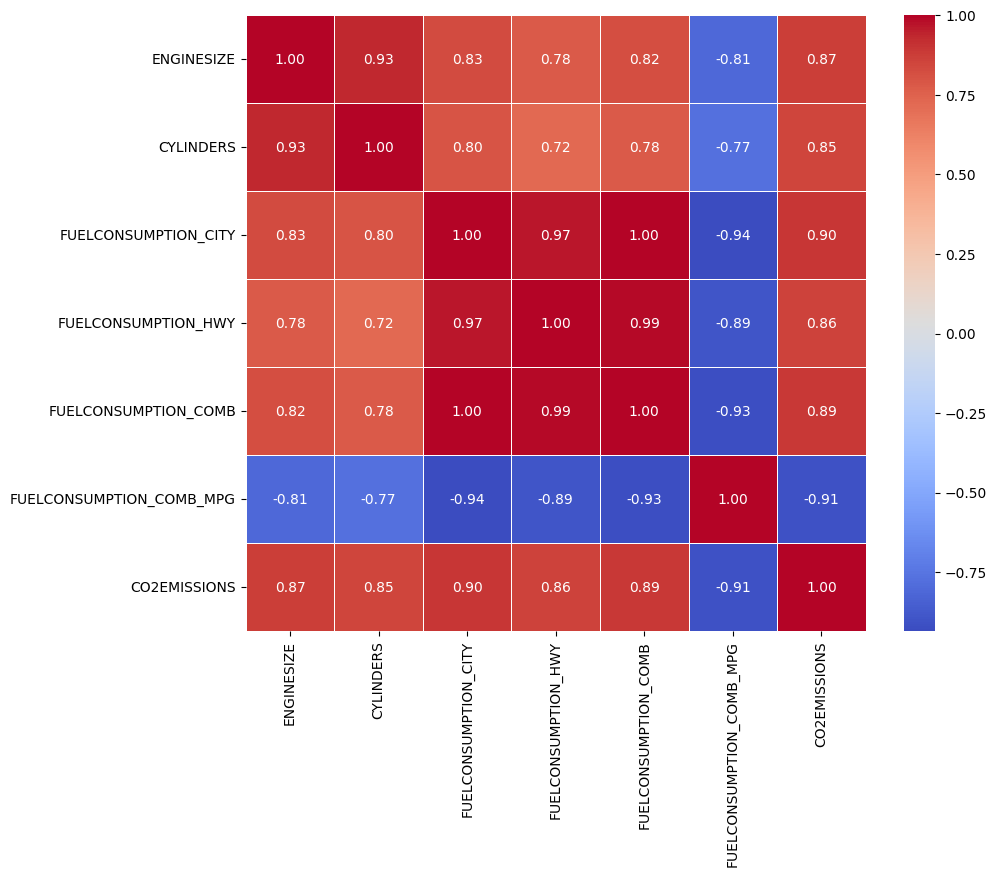

In [12]:
# Matrice di correlazione delle features numeriche con la varibile target CO2EMISSIONS
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
correlation_matrix = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [14]:
# Selezione di alcune featrures: sulla base della matrice di correlazione
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
897,2.7,6,9.2,212
92,2.0,4,8.7,200
825,1.2,3,6.4,147
971,2.5,4,6.0,138
286,3.6,6,10.9,251


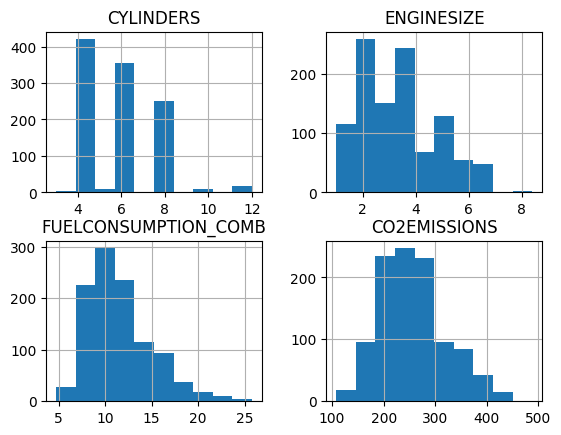

In [15]:
# Distribuzione delle features selezionate
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

La maggior parte delle auto ha motori con 4, 6, o 8 cilindri e una dimensione del motore tra i 2 e i 4 litri. Il consumo del carburante e l'emissione di CO2 seguono una distribuzione simile.

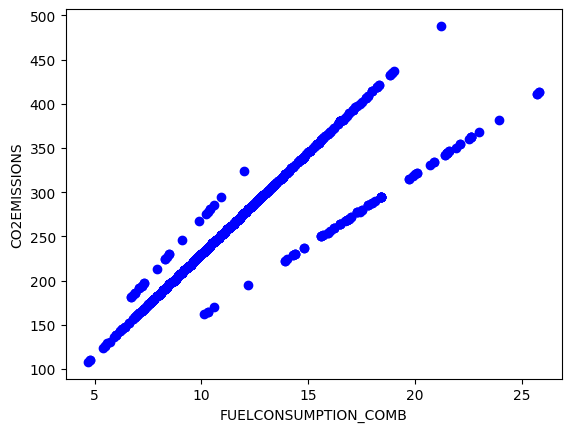

In [17]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

Si nota una certa dipendenza lineare tra le due variabili.


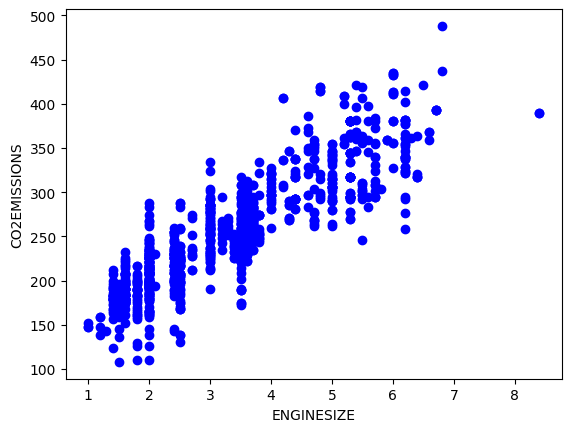

In [19]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
#plt.xlim(0,27)
plt.show()

Correlazione lineare più debole rispetto alla precedente.


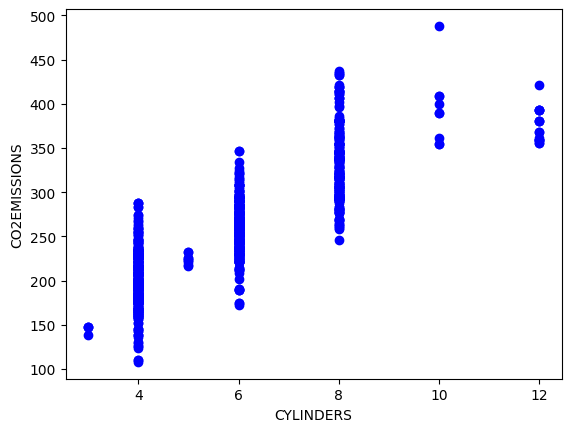

In [20]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

## Preprocessing (1)
In questo caso si utilizza la varibile ENGINESIZE per predire CO2EMISSIONS.


In [24]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

# Suddivisione dei dati nel train-set (80%) e test-set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(type(X_train), np.shape(X_train), np.shape(X_train))
print(type(X_test), np.shape(X_test), np.shape(X_test))

<class 'numpy.ndarray'> (853,) (853,)
<class 'numpy.ndarray'> (214,) (214,)


## Definizione del modello di regressione lineare


In [28]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)  # reshape per avere (n_osservazioni, n_features)

# Coefficienti della regressione lineare
print (f'Coefficients: {regressor.coef_[0]:.3f}')
print (f'Intercept: {regressor.intercept_:.3f}')

Coefficients: 38.993
Intercept: 126.290


### Visualizzazione della regressione sul train set
Si può visualizzare la goodness-of-fit graficando la retta di regressione lineare sui dati a disposizione.



Text(0, 0.5, 'CO2EMISSIONS')

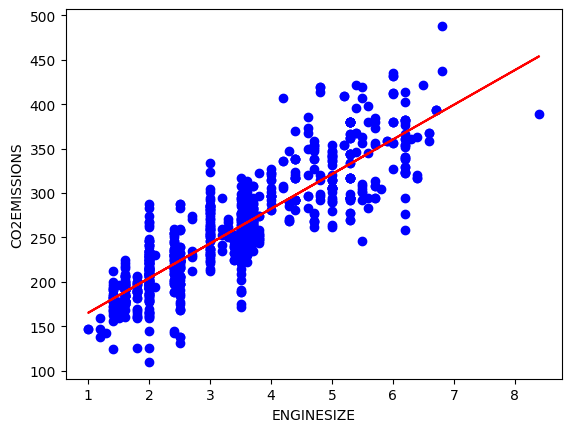

In [30]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

### Valutazione del modello tramite metriche

* Mean Absolute Error (MAE): è la media dell'errore assoluto.

* Mean Squared Error (MSE): è la media del quadrato dell'errore assoluto.

* Root Mean Squared Error (RMSE): trasforma la scala della MSE a quella delle variabili per una migliore interpretazione.

* R^2: indica quanto i dati sono vicini alla retta di regressione, valori vicini a 1.0 indicano buone performance.



In [32]:
# Predizioni sul test set (dati mai visti)
y_test_ = regressor.predict( X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.68


### Visualizzazione della regressione sul test set


Text(0, 0.5, 'CO2EMISSIONS')

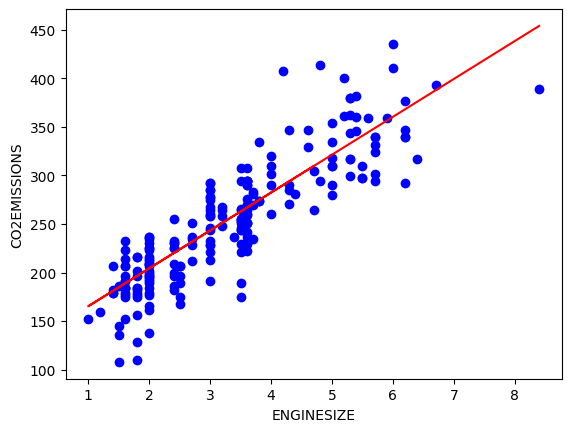

In [33]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

## Preprocessing (2)
In questo caso si utilizza la varibile FUELCONSUMPTION_COMB per predire CO2EMISSIONS.

In [34]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Definizione del modello
reg = linear_model.LinearRegression()
reg.fit(X_train.reshape(-1, 1), y_train)

# Coefficienti della regressione lineare
print (f'Coefficients: {reg.coef_[0]:.3f}')
print (f'Intercept: {reg.intercept_:.3f}')

Coefficients: 16.181
Intercept: 69.103


Text(0, 0.5, 'CO2EMISSIONS')

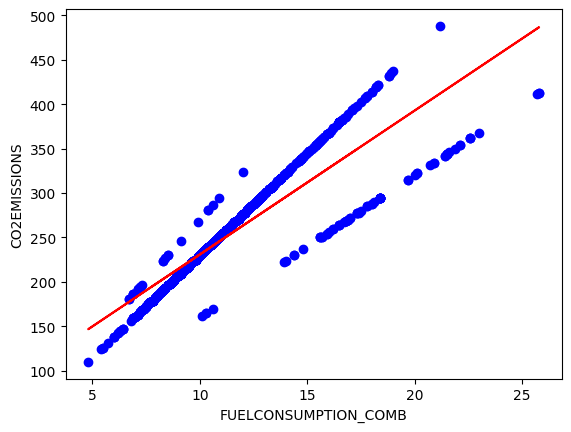

In [36]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, reg.coef_ * X_train + reg.intercept_, '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")

In [37]:
# Predizioni sul test set (dati mai visti)
y_test_ = reg.predict( X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

Mean absolute error: 20.44
Mean squared error: 797.43
Root mean squared error: 28.24
R2-score: 0.76


Text(0, 0.5, 'CO2EMISSIONS')

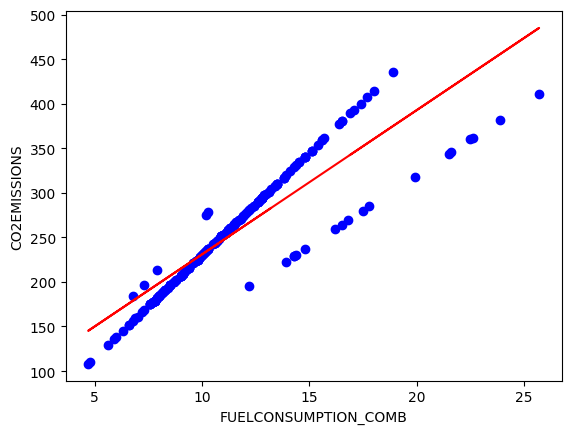

In [38]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, reg.coef_ * X_test + reg.intercept_, '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")